# Gaussian Mixture Model 

Based on 
- Andrew NG CS229 notes at http://cs229.stanford.edu/notes/cs229-notes7b.pdf. 
- GeeksforGeeks: https://www.geeksforgeeks.org/gaussian-mixture-model/

The **Gaussian mixture model** is an unsupervised/semi-supervised **Clustering Technique**. 

## Multivariate Gaussian Distribution

A vector-valued random variable $\mathbf{x} \in \mathbb{R}^{d}$ is said to have a **multivariate Gaussian distribution** with mean $\mu \in \mathbb{R}^{d}$ and covariance matrix $\Sigma \in \mathbf{S}^{d}_{++}$ if its pdf is given by

$$
\mathcal{N}(\mathbf{x}|\mu,\Sigma)=\frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}
exp \left(
-\frac{1}{2}(\mathbf{x}-\mu)^{T}\Sigma^{-1}(\mathbf{x}-\mu)
\right)
$$

## Mixture of Gaussians

Givem an unlabeled training set $\{x^{(i)}\}_{i=1}^{n}$, we wish to model the joint distribution of the data, $p(x^{(i)},z^{(i)})=p(x^{(i)} |z^{(i)}) p(z^{(i)})$, where the **latent variables** $z^{(i)} \sim \text{Multinomial}(\phi)$, with 

$$
\begin{cases} 
\phi_j \geq 0 \\ 
\sum_{j=1}^{k}\phi_j = 1 \\ 
\phi_{j} = p(z^{(i)}=j) \\ 
x^{(i)} |z^{(i)} \sim \mathcal{N}(\mu_j, \Sigma_j)
\end{cases}
$$

and let $z^{(i)}$ take on $k$ values. This means that each $x^{(i)}$ was generated by randomly choosing $z^{(i)}$ from $\{1,\dots,k\}$, and then the $x^{(i)}$ was generated from one of the $k$ Gaussians depending on $z^{(i)}$

## Likelihood

If we wanted to estimate the parameters of our model, we could write the likelihood: 

$$
\mathcal{L}(\phi, \mu, \Sigma) = \prod_{i=1}^{m} p(x^{(i)}; \phi, \mu, \Sigma)
$$

$$
log \propto
$$

$$
\begin{align}
\ell(\phi, \mu, \Sigma) = & \sum_{i=1}^{m} \log p(x^{(i)}; \phi, \mu, \Sigma) \\
& \sum_{i=1}^{m} \log \sum_{z^{(i)}=1}^{k} p(x^{(i)} |z^{(i)}; \mu , \Sigma)p(z^{(i)}; \phi)
\end{align}
$$

However this cannot be solved in closed form, to instead we use the **Expectation-Maximization(EM) algorithm**. 


## EM-algorithm

If the $z^{(i)}$ were known, we could easily maximize the parameters by taking the gradient and setting to 0. In such a case, the likelihood could be written as 

$$
\ell(\phi, \mu, \Sigma) = \sum_{i=1}^{m} \log p(x^{(i)}|z^{(i)}; \mu, \Sigma) + \log p(z^{(i)}; \phi)
$$

Mazimizing with respect to the parameters, we would get  

$$
\phi_j = \frac{1}{m}\sum_{i=1}^{m} \mathbb{1} \{z^{(i)} = 1\}
$$
$$
\mu_j = \frac{\sum_{i=1}^{m} \mathbb{1} \{z^{(i)} = 1 \}x^(i) }{\sum_{i=1}^{m} \mathbb{1} \{z^{(i)} = 1 \}}
$$
$$
\Sigma_j = \frac{\sum_{i=1}^{m} \mathbb{1} \{ z^{(i)} = 1 \}(x^{(i)} - \mu_j)(x^{(i)} - \mu_j)^{T}  }{\sum_{i=1}^{m} \mathbb{1} \{z^{(i)} = 1 \}}
$$

However, the $z^{(i)}$'s are unknown, so we employ the **Expectation-Maximization** algorithm: 


### EM Algorithm 

Repeat until convergence{ 

    (E-step) For each  {i,j} set 
    
$$
w^{(i)}_j := p(z^{(i)} = j | x^{(i)}; \phi, \mu \Sigma)
$$

    (M-step) Update the parameters: 
    


$$
\phi_j = \frac{1}{m}\sum_{i=1}^{m} w^{(i)}_j
$$
$$
\mu_j = \frac{\sum_{i=1}^{m} w^{(i)}_j x^{(i)} }{\sum_{i=1}^{m}  w^{(i)}_j}
$$
$$
\Sigma_j = \frac{\sum_{i=1}^{m} w^{(i)}_j(x^{(i)} - \mu_j)(x^{(i)} - \mu_j)^{T}  }{\sum_{i=1}^{m} w^{(i)}_j}
$$

} 


In the E-step, we calculate the *posterior* probability of our parameters $z^{(i)}$ , given the $x^{(i)}$ and using the **current setting of our parameters**. By **Bayes rule**, 

$$
p(z^{(i)} = j | x^{(i)}; \phi, \mu ,\Sigma) 
= 
\frac{p(x^{(i)} | z^{(i)} = j ;  \mu,\Sigma)p(z^{(i)} = j ; \phi)}{\sum_{l=1}^{k} p(x^{(i)} | z^{(i)} = j ;  \mu,\Sigma)p(z^{(i)} = j ; \phi)}
$$

Where $p(z^{(i)} = j | x^{(i)}; \phi, \mu ,\Sigma)$  is given by evaluating the density of a Gaussian with mean $\mu_j$ and coariance $\Sigma_j$ at $x^{(i)}$; and $p(z^{(i)} = j ; \phi)$ is given by $\phi_j$, etc. The values of $w^{(i)}_j$from the E-step reprsent the "soft guesses" for the values of $z^{(i)}_j$

## Python Implementation

### Imports 

In [2]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.mixture import GaussianMixture ## This contains the algorithm 
from IPython.display import HTML, display

### Load and inspect the data 

In [26]:
iris = datasets.load_iris()  # load the iris dataset 
iris_data = iris.data # obtain the data 
iris_colnames = iris.feature_names  # obtain column names 
iris_df = pd.DataFrame(iris_data, columns = iris_colnames)
display(iris_df) # display the dataframe 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


We will only use the first two columns 

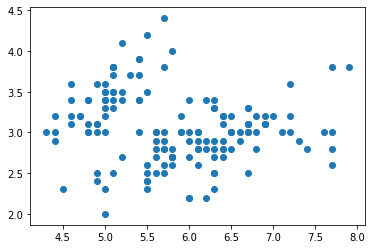

In [29]:
iris_df = iris_df[['sepal length (cm)','sepal width (cm)']] # subset the data 
plt.scatter(iris_df.iloc[:,0],iris_df.iloc[:,1])

### Fit a Gaussian Mixture  
We will now fit a mixture of 3 Gaussians , then cluster based on the fitted Gaussians 

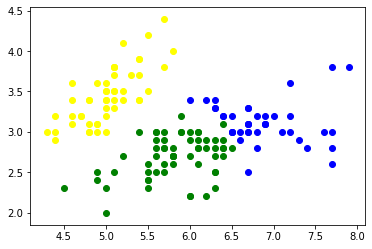

In [41]:
## Fit the models 
gmm = GaussianMixture(n_components=3) # initialize Gaussian mix object 
gmm.fit(iris_df) # Git the GMM model for the dataset

## Assign the mixture components 
labels = gmm.predict(iris_df) 
iris_df['labels'] = labels
d0 = iris_df[iris_df['labels']==0] # select all labels for first mix 
d1 = iris_df[iris_df['labels']==1] # select all labels for second mix 
d2 = iris_df[iris_df['labels']==2] # select all labels for third mix 


## Plot three clusters in the same plot 
plt.scatter(d0.iloc[:,0:1],d0.iloc[:,1:2], c='blue')
plt.scatter(d1.iloc[:,0:1],d1.iloc[:,1:2], c='yellow')
plt.scatter(d2.iloc[:,0:1],d2.iloc[:,1:2], c='g')

How many iterations did the model need to converge? 

In [40]:
print("GMM Converged log-likelihood ", gmm.lower_bound_)  
print("Print the number of iterations needed", gmm.n_iter_)


GMM Converged log-likelihood  4.372457879667469
Print the number of iterations needed 2
